In [1]:
import nease
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

### VastDB pre-processing

In [2]:
data_folder='/home/zakaria/projects/exon_enrch/data/'
events= pd.read_table(data_folder+"VASTDB_PSI_Hsa108_hg19.tab")
annot= pd.read_table(data_folder+"events_all.tab")

In [3]:
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_colwidth', -1)


In [4]:
events.head(10)

,GENE,EVENT,COORD,LENGTH,FullCO,COMPLEX,Adipose_b,Adipose_b-Q,Adipose_c,Adipose_c-Q,Adipose_d,Adipose_d-Q,Adrenal_b,Adrenal_b-Q,Adrenal_c,Adrenal_c-Q,Amnion,Amnion-Q,Astrocytes,Astrocytes-Q,Bladder_a,Bladder_a-Q,Bone_marrow_a,Bone_marrow_a-Q,Bone_marrow_b,Bone_marrow_b-Q,Bone_marrow_c,Bone_marrow_c-Q,Brain_Endoth,Brain_Endoth-Q,Breast_Epith_a,Breast_Epith_a-Q,Breast_a,Breast_a-Q,CL_293T,CL_293T-Q,CL_Gm12878,CL_Gm12878-Q,CL_HeLa,CL_HeLa-Q,CL_K562,CL_K562-Q,CL_LP1,CL_LP1-Q,CL_MB231,CL_MB231-Q,CL_MCF7,CL_MCF7-Q,CL_PNT2,CL_PNT2-Q,Cerebellum_a,Cerebellum_a-Q,Cerebellum_c,Cerebellum_c-Q,Chorion,Chorion-Q,Colon_b,Colon_b-Q,Colon_sigmoid,Colon_sigmoid-Q,Colon_transverse,Colon_transverse-Q,Cortex,Cortex-Q,Decidua,Decidua-Q,ESC_H1_a,ESC_H1_a-Q,ESC_H1_b,ESC_H1_b-Q,ESC_H1_c,ESC_H1_c-Q,ESC_H1_d,ESC_H1_d-Q,ESC_H9_a,ESC_H9_a-Q,ESC_H9_b,ESC_H9_b-Q,Embr_Cortex_13_17wpc,Embr_Cortex_13_17wpc-Q,Embr_Forebrain_9_12wpc,Embr_Forebrain_9_12wpc-Q,Embr_Forebrain_St13_14,Embr_Forebrain_St13_14-Q,Embr_Forebrain_St17_20,Embr_Forebrain_St17_20-Q,Embr_Forebrain_St22_23,Embr_Forebrain_St22_23-Q,EndomStromCells,EndomStromCells-Q,EndothCells,EndothCells-Q,EpithelialCells,EpithelialCells-Q,Fibroblasts,Fibroblasts-Q,Frontal_Gyrus_old,Frontal_Gyrus_old-Q,Frontal_Gyrus_young,Frontal_Gyrus_young-Q,GLS_Cells,GLS_Cells-Q,HFDPC,HFDPC-Q,HMEpC_a,HMEpC_a-Q,Heart_a,Heart_a-Q,Heart_b,Heart_b-Q,Heart_c,Heart_c-Q,Kidney_b,Kidney_b-Q,Kidney_c,Kidney_c-Q,Kidney_d,Kidney_d-Q,Liver_a,Liver_a-Q,Liver_b,Liver_b-Q,Liver_c,Liver_c-Q,Lung_b,Lung_b-Q,Lung_e,Lung_e-Q,Lung_f,Lung_f-Q,Lymph_node_b,Lymph_node_b-Q,Lymph_node_c,Lymph_node_c-Q,MNC,MNC-Q,MSC,MSC-Q,Melanocytes,Melanocytes-Q,Microglia,Microglia-Q,Muscle_b,Muscle_b-Q,Muscle_d,Muscle_d-Q,Muscle_e,Muscle_e-Q,NPC_a,NPC_a-Q,NPC_b,NPC_b-Q,Neuroblastoma,Neuroblastoma-Q,Neurons,Neurons-Q,Oligodendrocytes,Oligodendrocytes-Q,Ovary_a,Ovary_a-Q,Ovary_b,Ovary_b-Q,Placenta_Epith,Placenta_Epith-Q,Placenta_a,Placenta_a-Q,Placenta_b,Placenta_b-Q,Placenta_c,Placenta_c-Q,Prostate_b,Prostate_b-Q,Prostate_c,Prostate_c-Q,Prostate_d,Prostate_d-Q,Retina_a,Retina_a-Q,Retina_macular,Retina_macular-Q,Retina_peripheral,Retina_peripheral-Q,Skin,Skin-Q,Small_intestine,Small_intestine-Q,Spleen_a,Spleen_a-Q,Spleen_b,Spleen_b-Q,Stomach_a,Stomach_a-Q,Stomach_b,Stomach_b-Q,Sup_Temporal_Gyrus,Sup_Temporal_Gyrus-Q,Testis_a,Testis_a-Q,Testis_b,Testis_b-Q,Testis_c,Testis_c-Q,Thymus_a,Thymus_a-Q,Thymus_b,Thymus_b-Q,Thyroid_b,Thyroid_b-Q,Thyroid_c,Thyroid_c-Q,Thyroid_d,Thyroid_d-Q,WBC_MNC_b,WBC_MNC_b-Q,WBC_MNC_c,WBC_MNC_c-Q,Whole_Brain_b,Whole_Brain_b-Q,iPS_a,iPS_a-Q,iPS_b,iPS_b-Q
0,A1CF,HsaALTA0000001-1/2,chr10:52573617-52573798,0,"chr10:52575766,52573617-52573822+52573798",Alt3,NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,1=1,S@0,0",80.00,"N,N,N,5=5,S@4.00,1.00",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,5=5,S@5.00,0.00",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,7=7,S@7.00,0.00",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",0.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",65.09,"SOK,SOK,SOK,106=106,S@69.00,37.00",93.33,"VLOW,VLOW,VLOW,15=15,S@14.00,1.00",88.28,"SOK,SOK,SOK,145=145,S@128.01,16.99",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",0.00,"N,N,N,1=1,S@0,0",0.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,2=2,S@2.00,0.00",NaN,"N,N,N,0=0,S@0,0",86.00,"OK,OK,OK,50=50,S@43.00,7.00",81.63,

In [5]:
# extract the events in the following tissues
tissue={}

#muscles
tissue['Muscles']=['Heart_c' ,'Heart_a' ,'Heart_b','Muscle_b','Muscle_e']

#Embryonic Brain
tissue['Embryonic']=['Embr_Forebrain_St13_14']

#Neural
tissue['Neural']=['Whole_Brain_b','Cortex']


#Placental
tissue['Placental']=['Placenta_a' , 'Placenta_b' , 'Placenta_c' ]

# Epithelial
tissue['Epithelial']= [ 'Skin' , 'Placenta_Epith' , 'EpithelialCells'] 


# Digestive Tract
tissue['Digestive']= [ 'Colon_b' ,'Stomach_a','Stomach_b'  ]

# liver
tissue['liver']= ['Liver_a' , 'Liver_b' ,'Liver_c' ]

# Kidney
tissue['Kidney']=['Kidney_c','Kidney_b']

# Adipose
tissue['Adipose']= [ 'Adipose_b' , 'Adipose_c' , 'Adipose_d']


# Testis
tissue['Testis']=[ 'Testis_a', 'Testis_c']



#Immune-Hematopoietic


tissue['Immune-Hematopoietic']=['Bone_marrow_a', 'Bone_marrow_b','Lymph_node_c']

#Ovary
tissue['Ovary']=['Ovary_a','Ovary_b']



In [6]:
tissues=[]
for x in list(tissue.values()):
    tissues=tissues+x

In [7]:

events=events[['EVENT']+tissues+[ t+'-Q' for t in tissues ]]

In [8]:
events

,EVENT,Heart_c,Heart_a,Heart_b,Muscle_b,Muscle_e,Embr_Forebrain_St13_14,Whole_Brain_b,Cortex,Placenta_a,Placenta_b,Placenta_c,Skin,Placenta_Epith,EpithelialCells,Colon_b,Stomach_a,Stomach_b,Liver_a,Liver_b,Liver_c,Kidney_c,Kidney_b,Adipose_b,Adipose_c,Adipose_d,Testis_a,Testis_c,Bone_marrow_a,Bone_marrow_b,Lymph_node_c,Ovary_a,Ovary_b,Heart_c-Q,Heart_a-Q,Heart_b-Q,Muscle_b-Q,Muscle_e-Q,Embr_Forebrain_St13_14-Q,Whole_Brain_b-Q,Cortex-Q,Placenta_a-Q,Placenta_b-Q,Placenta_c-Q,Skin-Q,Placenta_Epith-Q,EpithelialCells-Q,Colon_b-Q,Stomach_a-Q,Stomach_b-Q,Liver_a-Q,Liver_b-Q,Liver_c-Q,Kidney_c-Q,Kidney_b-Q,Adipose_b-Q,Adipose_c-Q,Adipose_d-Q,Testis_a-Q,Testis_c-Q,Bone_marrow_a-Q,Bone_marrow_b-Q,Lymph_node_c-Q,Ovary_a-Q,Ovary_b-Q
0,HsaALTA0000001-1/2,NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00,NaN,65.09,100.00,71.43,71.20,65.77,65.29,81.63,86.00,NaN,100.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,"N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,2=2,S@2.00,0.00","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","VLOW,VLOW,VLOW,10=10,S@5.00,5.00","N,N,N,0=0,S@0,0","SOK,SOK,SOK,106=106,S@69.00,37.00","N,N,N,3=3,S@3.00,0.00","VLOW,VLOW,VLOW,14=14,S@10.00,4.00","SOK,SOK,SOK,184=183,S@131.01,52.99","SOK,SOK,SOK,1306=1303,S@858.96,447.04","SOK,SOK,SOK,412=412,S@268.99,143.01","OK,OK,OK,49=49,S@40.00,9.00","OK,OK,OK,50=50,S@43.00,7.00","N,N,N,0=0,S@0,0","N,N,N,1=1,S@0,0","N,N,N,0=0,S@0,0","N,N,N,1=1,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,4=4,S@0.00,4.00"
1,HsaALTA0000001-2/2,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00,NaN,34.91,0.00,28.57,28.80,34.23,34.71,18.37,14.00,NaN,0.00,NaN,100.00,NaN,NaN,NaN,NaN,NaN,100.00,"N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,2=2,S@0.00,2.00","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","VLOW,VLOW,VLOW,10=10,S@5.00,5.00","N,N,N,0=0,S@0,0","SOK,SOK,SOK,106=106,S@37.00,69.00","N,N,N,3=3,S@0.00,3.00","VLOW,VLOW,VLOW,14=14,S@4.00,10.00","SOK,SOK,SOK,184=183,S@52.99,131.01","SOK,SOK,SOK,1306=1303,S@447.04,858.96","SOK,SOK,SOK,412=412,S@143.01,268.99","OK,OK,OK,49=49,S@9.00,40.00","OK,OK,OK,50=50,S@7.00,43.00","N,N,N,0=0,S@0,0","N,N,N,1=1,S@0,0","N,N,N,0=0,S@0,0","N,N,N,1=1,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,4=4,S@4.00,0.00"
2,HsaALTA0000009-1/2,NaN,100.00,NaN,NaN,0.00,20.47,0.00,50.72,100.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,33.98,NaN,NaN,0.00,NaN,40.70,0.00,NaN,0.00,NaN,20.47,NaN,100.00,20.47,NaN,0.00,"N,N,N,0=0,S@0,0","N,N,N,1=1,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,1=1,S@0,0","N,N,N,5=4,C2@1.02,3.98","N,N,N,1=1,S@0,0","N,N,N,2=2,S@1.01,0.99","N,N,N,1=1,S@0,0","N,N,N,1=1,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,3=3,S@1.02,1.98","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,2=2,S@0.00,2.00","N,N,N,0=0,S@0,0","N,N,N,5=5,S@2.04,2.96","N,N,N,2=2,S@0.00,2.00","N,N,N,0=0,S@0,0","N,N,N,3=3,S@0.00,3.00","N,N,N,0=0,S@0,0","LOW,LOW,LOW,25=25,S@5.12,19.88","N,N,N,0=0,S@0,0","N,N,N,1=1,S@0,0","N,N,N,5=5,S@1.02,3.98","N,N,N,0=0,S@0,0","N,N,N,6=6,S@0.00,6.00"
3,HsaALTA0000009-2/2,NaN,0.00,NaN,NaN,100.00,79.53,100.00,49.28,0.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,66.02,NaN,NaN,100.00,NaN,59.30,100.00,NaN,100.00,NaN,79.53,NaN,0.00,79.53,NaN,100.00,"N,N,N,0=0,S@0,0","N,N,N,1=1,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,1=1,S@0,0","N,N,N,5=4,C2@3.98,1.02","N,N,N,1=1,S@0,0","N,N,N,2=2,S@0.99,1.01","N,N,N,1=1,S@0,0","N,N,N,1=1,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,3=3,S@1.98,1.02","N,N,N,0=0,S@0,0","N,N,N,0=0,S@0,0","N,N,N,2=2,S@2.00,0.00","N,N,N,0=0,S@0,0","N,N,N,5=5,S@2.96,2.04","N,N,N,2=2,S@2.00,0.

In [9]:
# quality of dataset filter
psi=events
for t in tissues:
    psi=psi[(psi[t+'-Q'].str.startswith('OK')) | (psi[t+'-Q'].str.startswith('SOK')) | (psi[t+'-Q'].str.startswith('L'))]
    #psi=psi[(psi[t+'-Q'].str.startswith('OK')) | (psi[t+'-Q'].str.startswith('SOK'))]

psi=psi[['EVENT']+tissues]
len(psi)

6700

In [10]:
for t in list(tissue.keys()):

    psi[t]=psi[tissue[t]].median(axis = 1, skipna = True) 

In [11]:
psi_tissue=psi[['EVENT']+list(tissue.keys())]

In [12]:
tissues=list(tissue.keys())

In [13]:
psi_tissue

,EVENT,Muscles,Embryonic,Neural,Placental,Epithelial,Digestive,liver,Kidney,Adipose,Testis,Immune-Hematopoietic,Ovary
8,HsaALTA0000019-1/2,2.06,4.14,2.265,0.00,1.72,2.67,1.74,6.865,2.89,1.415,10.04,3.010
9,HsaALTA0000019-2/2,97.94,95.86,97.735,100.00,98.28,97.33,98.26,93.135,97.11,98.585,89.96,96.990
45,HsaALTA0000070-1/2,27.43,34.60,38.180,24.50,28.54,26.47,32.89,25.410,25.05,30.625,27.85,34.095
46,HsaALTA0000070-2/2,72.57,65.40,61.820,75.50,71.46,73.53,67.11,74.590,74.95,69.375,72.15,65.905
77,HsaALTA0000108-1/2,7.08,6.67,16.515,8.89,5.24,10.08,5.13,5.555,7.72,10.680,8.39,6.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68887,HsaINT0188301,9.18,45.92,14.300,46.54,8.71,29.72,31.76,16.645,18.18,12.705,16.90,23.290
68888,HsaINT0188305,8.08,19.65,17.670,18.04,17.86,16.61,13.03,18.840,21.09,8.385,13.21,19.460
68941,HsaINT0188747,0.00,1.36,2.015,4.00,16.28,5.08,6.80,4.320,1.72,0.390,3.79,1.595
68942,HsaINT0188750,19.20,21.72,28.395,35.53,44.11,27.83,42.64,39.460,36.69,19.395,28.96,31.295


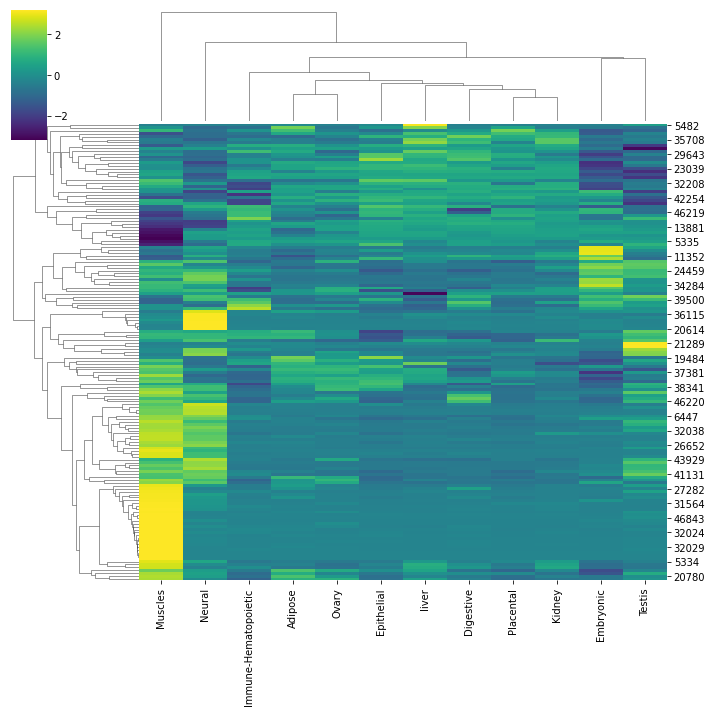

In [14]:
psi_tissue['std']=psi_tissue[tissues].std(axis = 1, skipna = True) 
psi_tissue['mean']=psi_tissue[tissues].mean(axis = 1, skipna = True) 
psi_var=psi_tissue[psi_tissue['std']>20]
g = sns.clustermap(psi_var[tissues],cmap="viridis",z_score=0)


In [15]:
tissue_interest='Muscles'
psi_tissue['Zscore']=(psi_tissue[tissue_interest] - psi_tissue['mean'])/psi_tissue['std']
psi_tissue

,EVENT,Muscles,Embryonic,Neural,Placental,Epithelial,Digestive,liver,Kidney,Adipose,Testis,Immune-Hematopoietic,Ovary,std,mean,Zscore
8,HsaALTA0000019-1/2,2.06,4.14,2.265,0.00,1.72,2.67,1.74,6.865,2.89,1.415,10.04,3.010,2.720665,3.234583,-0.431726
9,HsaALTA0000019-2/2,97.94,95.86,97.735,100.00,98.28,97.33,98.26,93.135,97.11,98.585,89.96,96.990,2.720665,96.765417,0.431726
45,HsaALTA0000070-1/2,27.43,34.60,38.180,24.50,28.54,26.47,32.89,25.410,25.05,30.625,27.85,34.095,4.407025,29.636667,-0.500716
46,HsaALTA0000070-2/2,72.57,65.40,61.820,75.50,71.46,73.53,67.11,74.590,74.95,69.375,72.15,65.905,4.407025,70.363333,0.500716
77,HsaALTA0000108-1/2,7.08,6.67,16.515,8.89,5.24,10.08,5.13,5.555,7.72,10.680,8.39,6.450,3.182437,8.200000,-0.351932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68887,HsaINT0188301,9.18,45.92,14.300,46.54,8.71,29.72,31.76,16.645,18.18,12.705,16.90,23.290,13.068890,22.820833,-1.043764
68888,HsaINT0188305,8.08,19.65,17.670,18.04,17.86,16.61,13.03,18.840,21.09,8.385,13.21,19.460,4.341859,15.993750,-1.822664
68941,HsaINT0188747,0.00,1.36,2.015,4.00,16.28,5.08,6.80,4.320,1.72,0.390,3.79,1.595,4.378049,3.945833,-0.901277
68942,HsaINT0188750,19.20,21.72,28.395,35.53,44.11,27.83,42.64,39.460,36.69,19.395,28.96,31.295,8.592182,31.268750,-1.404620


In [16]:
psi_filtred=psi_tissue[ psi_tissue['Zscore']>2]
len(psi_filtred)

230

In [17]:
psi_filtred=psi_filtred[  (psi_filtred['mean']>1) &   (psi_filtred['mean']<95) ]
psi_filtred=psi_filtred[  psi_filtred[tissue_interest]>25 ]
len(psi_filtred)

125

## Clustering and visualization

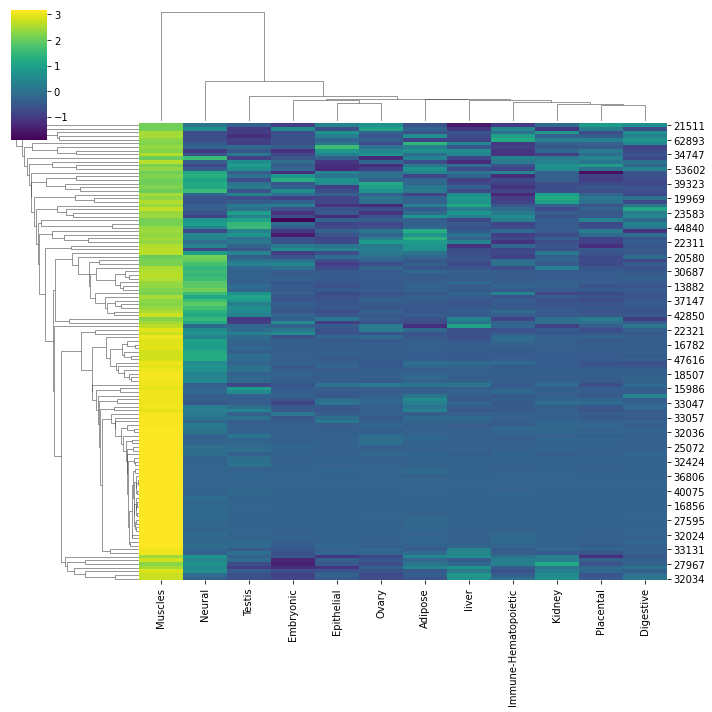

In [18]:
g = sns.clustermap(psi_filtred[tissues],cmap="viridis",z_score=0)


### Prepare the list of events in NEASE format

In [19]:
event_cord=pd.merge(annot,psi_filtred['EVENT'])    


In [20]:
event_cord['start']= event_cord['COORD_o'].apply(lambda x: x.split('-')[0].split(':')[1])
event_cord['end']= event_cord['COORD_o'].apply(lambda x: x.split('-')[1])
#event_cord=event_cord[['GENE','start','end']]

In [21]:
# convert gene names to gene IDs using nease functions
convert_help=nease.functions.database_mapping['Human'][['Gene name','Gene stable ID']]
input=pd.merge(event_cord,convert_help,left_on='GENE',right_on='Gene name')
input=input[['Gene stable ID','start','end']].drop_duplicates()
input

,Gene stable ID,start,end
0,ENSG00000009307,114741527,114741673
107,ENSG00000047849,47987383,47987433
136,ENSG00000047849,47909038,47912421
165,ENSG00000047849,,47852938
194,ENSG00000065882,38051899,38052060
...,...,...,...
7530,ENSG00000148396,136446855,136447015
7593,ENSG00000170248,33828838,33828969
7628,ENSG00000087274,2904764,2905108
7686,ENSG00000111667,6863186,6863377


## NEASE analysis


In [22]:
# Run nease with standard input.
events=nease.run(input, organism='Human')

Delta PSI column was not found. Proceeding with all events (no filtering)

		Data Summary
**************************************************
26 protein domains are affected by AS.
15 of the affected domains have known interactions.
102 protein interactions/binding affected.

**************************************************
Running enrichment analysis...
NEASE enrichment done.


In [23]:
# Run on KEGG gene set
events.classic_enrich(gseapy_databases=['Reactome_2016']).head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2016,XBP1(S) activates chaperone genes Homo sapiens R-HSA-381038,4/53,0.000091,0.012931,0,0,19.075150,177.525552,DCTN1;GFPT1;TLN1;ADD1
1,Reactome_2016,IRE1alpha activates chaperones Homo sapiens R-HSA-381070,4/55,0.000105,0.012931,0,0,18.325260,167.876748,DCTN1;GFPT1;TLN1;ADD1
2,Reactome_2016,Membrane Trafficking Homo sapiens R-HSA-199991,9/420,0.000105,0.012931,0,0,5.337591,48.893945,TBC1D1;DCTN1;SEC16A;SNAP23;CLTC;AP1S2;TMED2;MIA3;DNM2
3,Reactome_2016,Asparagine N-linked glycosylation Homo sapiens R-HSA-446203,7/259,0.000157,0.014500,0,0,6.659553,58.324960,GANAB;RPN2;DCTN1;SEC16A;GFPT1;TMED2;MIA3
4,Reactome_2016,trans-Golgi Network Vesicle Budding Homo sapiens R-HSA-199992,4/70,0.000268,0.016511,0,0,14.149733,116.350117,SNAP23;CLTC;AP1S2;DNM2
5,Reactome_2016,Clathrin derived vesicle budding Homo sapiens R-HSA-421837,4/70,0.000268,0.016511,0,0,14.149733,116.350117,SNAP23;CLTC;AP1S2;DNM2
6,Reactome_2016,Vesicle-mediated transport Homo sapiens R-HSA-5653656,9/492,0.000341,0.017975,0,0,4.525155,36.127320,TBC1D1;DCTN1;SEC16A;SNAP23;CLTC;AP1S2;TMED2;MIA3;DNM2
7,Reactome_2016,Smooth Muscle Contraction Homo sapiens R-HSA-445355,3/33,0.000422,0.019462,0,0,23.117442,179.637808,MYL6;TPM1;TLN1
8,Reactome_2016,Lysosome Vesicle Biogenesis Homo sapiens R-HSA-432720,3/35,0.000503,0.020619,0,0,21.670422,164.589031,CLTC;AP1S2;DNM2
9,Reactome_2016,Unfolded Protein Response (UPR) Homo sapiens R-HSA-381119,4/86,0.000589,0.021736,0,0,11.379627,84.630282,DCTN1;GFPT1;TLN1;ADD1


In [24]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.

events.get_edges().head(10)

,Gene name,NCBI gene ID,dPSI,Pfam ID,Number of affected interactions,Affected binding,Affected binding (NCBI)
0,TPM1,7168,-,PF00261,18,"MYH8,TPM4,MYH6,ACTC1,MYH1,TPM3,MYO18A,MYH4,TNNT2,TNNT1,TPM1,MYH9,MYO19,ACTA2,TNNI1,MYH7B,MYH2,TPM2","4626,7171,4624,70,4619,7170,399687,4622,7139,7138,7168,4627,80179,59,7135,57644,4620,7169"
1,USP5,8078,-,PF00443,14,"USP28,UCHL3,SNAI2,PSMA3,ZFP91,ATG16L1,USP13,RAD23A,UBC,UBTD2,STK33,RAD23B,PBK,OXSR1","57646,7347,6591,80829,5684,55054,8975,5886,7316,92181,65975,5887,55872,9943"
2,SLC25A3,5250,-,PF00153,10,"RIPK4,MTCH2,MAPK6,MTCH1,PRKCZ,DYRK2,CDK9,SLC25A20,TOMM20,CDK2","54101,23788,5597,23787,5590,8445,1025,788,9804,1017"
3,DNM2,1785,-,PF01031,9,"H2AC4,CDK9,DNM2,TIAM2,DDX39B,DNM1,DNM3,PLEKHA4,PLK1","8335,1025,1785,26230,7919,1759,26052,57664,5347"
4,FKBP8,23770,-,PF00254,9,"RIPK4,RPS6KB2,EGFR,CAMK2A,CALM1,CDK20,FKBP8,MTOR,ARAF","54101,6199,1956,815,801,23552,2475,23770,369"
5,TMED2,10959,-,PF01105,8,"TMED4,TMED3,TMED1,TMED7,TMED5,TMED10,EIF3I,TMED9","222068,11018,23423,51014,50999,10972,8668,54732"
6,LIMS1,3987,-,PF00412,8,"EHMT2,STK11,BMP2K,DAPK1,LPXN,PXN,ILK,TRIP6","6794,10919,55589,1612,9404,5829,3611,7205"
7,TXN2,25828,-,PF00085,7,"RELA,PTBP3,TXN,TXNIP,RBM45,PRDX5,SNRNP70","5970,9991,7295,10628,6625,129831,25824"
8,IDE,3416,-,PF16187,4,"IGF2,UQCRC2,IGF1,INS","3481,7385,3479,3630"
9,CDC16,8881,-,PF12895,4,"CDC23,TTC8,CDC27,ANAPC7","8697,123016,996,51434"


In [25]:
# Run nease enrichment on affected edges

events.enrich(database=['Reactome']).head(25)

NEASE enrichment for the pathway databases:
 ['Reactome']
Found 3 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,R-HSA-397014,Muscle contraction,Reactome,"TPM1 (10), DST (1), LIMS1 (1), FKBP8 (2)",6.594665e-12,5.981361e-09,44.591233
1,R-HSA-445355,Smooth Muscle Contraction,Reactome,"TPM1 (5), DST (1), LIMS1 (1), FKBP8 (1)",1.601646e-08,9.684617e-06,35.899298
2,R-HSA-390522,Striated Muscle Contraction,Reactome,TPM1 (9),5.355682e-12,5.981361e-09,25.952863
3,R-HSA-6807878,COPI-mediated anterograde transport,Reactome,"TMED2 (4), IDE (1)",1.800615e-03,4.224126e-01,8.937303
4,R-HSA-15869,Metabolism of nucleotides,Reactome,"IMPDH2 (2), TXN2 (1)",1.841564e-03,4.224126e-01,8.905501
5,R-HSA-5576892,Phase 0 - rapid depolarisation,Reactome,"DST (1), FKBP8 (2)",1.862900e-03,4.224126e-01,8.889210
6,R-HSA-111957,Cam-PDE 1 activation,Reactome,"DST (1), FKBP8 (1)",2.350562e-03,4.737689e-01,8.560377
7,R-HSA-442745,Activation of CaMK IV,Reactome,"DST (1), FKBP8 (1)",2.745307e-03,4.790458e-01,8.340837
8,R-HSA-936837,Ion transport by P-type ATPases,Reactome,"DST (1), FKBP8 (2)",3.133712e-03,4.790458e-01,8.153700
9,R-HSA-425561,Sodium/Calcium exchangers,Reactome,"DST (1), FKBP8 (1)",3.168991e-03,4.790458e-01,8.137869


### Pathway specific analysis

In [26]:
events.path_analysis('R-HSA-445355')

Enrichment of the pathway: Smooth Muscle Contraction.

Overall p_value:  1.601645510171115e-08




,Spliced genes,NCBI gene ID,Gene knwon to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,TPM1,7168,True,5/18,1.135313e-08,"TPM4,TPM3,TPM1,ACTA2,TPM2","7171,7170,7168,59,7169"
1,DST,667,False,1/1,4.269350e-03,CALM1,801
2,LIMS1,3987,False,1/8,3.364988e-02,PXN,5829
3,FKBP8,23770,False,1/9,3.777588e-02,CALM1,801


In [27]:
events.Vis_path('R-HSA-445355')

Enrichment of the pathway: Smooth Muscle Contraction.

Overall p_value:  1.601645510171115e-08


Visualization of the pathway generated in: Smooth Muscle Contraction.html
